In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.keras as ke

In [2]:
!wget http://chaladze.com/l5/img/Linnaeus%205%20256X256.rar

--2021-09-16 00:51:55--  http://chaladze.com/l5/img/Linnaeus%205%20256X256.rar
Resolving chaladze.com (chaladze.com)... 74.208.236.157, 2607:f1c0:100f:f000::25c
Connecting to chaladze.com (chaladze.com)|74.208.236.157|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 454962798 (434M) [application/rar]
Saving to: ‘Linnaeus 5 256X256.rar’

Linnaeus 5 256X256. 100%[===================>] 433.89M  26.4MB/s    in 18s     

2021-09-16 00:52:13 (24.7 MB/s) - ‘Linnaeus 5 256X256.rar’ saved [454962798/454962798]



In [3]:
!unrar x Linnaeus\ 5\ 256X256.rar

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Extracting  Linnaeus 5 256X256/train/berry/825_256.jpg                    37% 38%  OK 
Extracting  Linnaeus 5 256X256/train/berry/826_256.jpg                    38%  OK 
Extracting  Linnaeus 5 256X256/train/berry/827_256.jpg                    38%  OK 
Extracting  Linnaeus 5 256X256/train/berry/828_256.jpg                    38%  OK 
Extracting  Linnaeus 5 256X256/train/berry/829_256.jpg                    38%  OK 
Extracting  Linnaeus 5 256X256/train/berry/82_256.jpg                     38%  OK 
Extracting  Linnaeus 5 256X256/train/berry/830_256.jpg                    38%  OK 
Extracting  Linnaeus 5 256X256/train/berry/831_256.jpg                    38%  OK 
Extracting  Linnaeus 5 256X256/train/berry/832_256.jpg                    38%  OK 
Extracting  Linnaeus 5 256X256/train/berry/833_256.jpg                    38%  OK 
Extra

In [4]:
!ls /content

'Linnaeus 5 256X256'  'Linnaeus 5 256X256.rar'	 sample_data


In [5]:
data_train = ke.preprocessing.image_dataset_from_directory("/content/Linnaeus 5 256X256/train",
                                                           batch_size=100, image_size=(224,224))

data_test = ke.preprocessing.image_dataset_from_directory("/content/Linnaeus 5 256X256/test",
                                                           batch_size=100, image_size=(224,224))

Found 6000 files belonging to 5 classes.
Found 2000 files belonging to 5 classes.


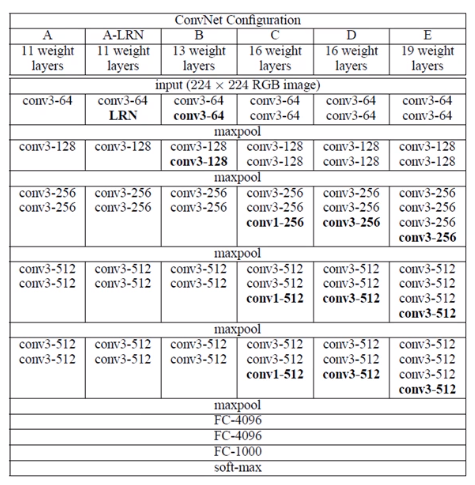

In [6]:
capa_entrada = ke.layers.Input(shape=(224,224,3))
capa_oculta = ke.layers.Rescaling(scale=1./255)(capa_entrada)


capa_oculta = ke.layers.Conv2D(64, 3,padding="same", activation="relu")(capa_oculta)
capa_oculta = ke.layers.Conv2D(64,3, padding="same", activation="relu")(capa_oculta)
capa_oculta = ke.layers.MaxPooling2D(2)(capa_oculta)

capa_oculta = ke.layers.Conv2D(128,3, padding="same", activation="relu")(capa_oculta)
capa_oculta = ke.layers.Conv2D(128,3, padding="same", activation="relu")(capa_oculta)
capa_oculta = ke.layers.MaxPooling2D(2)(capa_oculta)


capa_oculta = ke.layers.Conv2D(256,3, padding="same", activation="relu")(capa_oculta)
capa_oculta = ke.layers.Conv2D(256,3, padding="same", activation="relu")(capa_oculta)
capa_oculta = ke.layers.Conv2D(256, 3,padding="same", activation="relu")(capa_oculta)
capa_oculta = ke.layers.MaxPooling2D(2)(capa_oculta)


capa_oculta = ke.layers.Conv2D(512, 3,padding="same", activation="relu")(capa_oculta)
capa_oculta = ke.layers.Conv2D(512,3, padding="same", activation="relu")(capa_oculta)
capa_oculta = ke.layers.Conv2D(512,3, padding="same", activation="relu")(capa_oculta)
capa_oculta = ke.layers.MaxPooling2D(2)(capa_oculta)

capa_oculta = ke.layers.Conv2D(512,3, padding="same", activation="relu")(capa_oculta)
capa_oculta = ke.layers.Conv2D(512, 3,padding="same", activation="relu")(capa_oculta)
capa_oculta = ke.layers.Conv2D(512,3, padding="same", activation="relu")(capa_oculta)
capa_oculta = ke.layers.MaxPooling2D(2)(capa_oculta)

capa_oculta = ke.layers.Flatten()(capa_oculta)

capa_oculta = ke.layers.Dense(4096, activation="relu")(capa_oculta)
capa_oculta = ke.layers.Dense(4096, activation="relu")(capa_oculta)
capa_salida = ke.layers.Dense(5, activation="softmax")(capa_oculta) 


VGG = ke.models.Model(inputs=capa_entrada, outputs=capa_salida)
VGG.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584

In [7]:
VGG.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [8]:
log = VGG.fit(data_train,epochs=5,validation_data=data_test)

Epoch 1/5
60/60 [==============================] - 250s 3s/step - loss: 1.6093 - accuracy: 0.2105 - val_loss: 1.6091 - val_accuracy: 0.2535
Epoch 2/5
60/60 [==============================] - 189s 3s/step - loss: 1.6090 - accuracy: 0.2372 - val_loss: 1.6087 - val_accuracy: 0.2750
Epoch 3/5
60/60 [==============================] - 190s 3s/step - loss: 1.6086 - accuracy: 0.2513 - val_loss: 1.6082 - val_accuracy: 0.2870
Epoch 4/5
60/60 [==============================] - 189s 3s/step - loss: 1.6080 - accuracy: 0.2838 - val_loss: 1.6076 - val_accuracy: 0.2815
Epoch 5/5
60/60 [==============================] - 190s 3s/step - loss: 1.6071 - accuracy: 0.2862 - val_loss: 1.6065 - val_accuracy: 0.2965


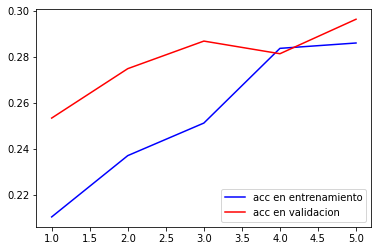

In [11]:
acc = log.history["accuracy"]
val_acc = log.history["val_accuracy"]
epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, color="blue", label="acc en entrenamiento")
plt.plot(epochs, val_acc, color="red", label = "acc en validacion")
plt.legend()

In [12]:
vgg16 = ke.applications.VGG16()

553476096/553467096 [==============================] - 6s 0us/step


In [14]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [15]:
w, b = vgg16.layers[1].get_weights()

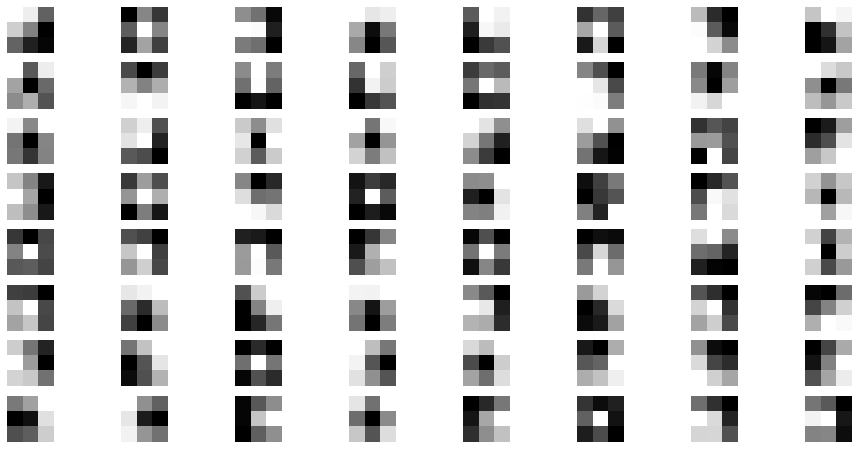

In [20]:
plt.figure(figsize=(16,8))
for i in range(64):
  plt.subplot(8,8,i+1)
  imagen = w[:,:,0,i]
  plt.imshow(imagen,cmap="gray")
  plt.axis("off")
plt.show()


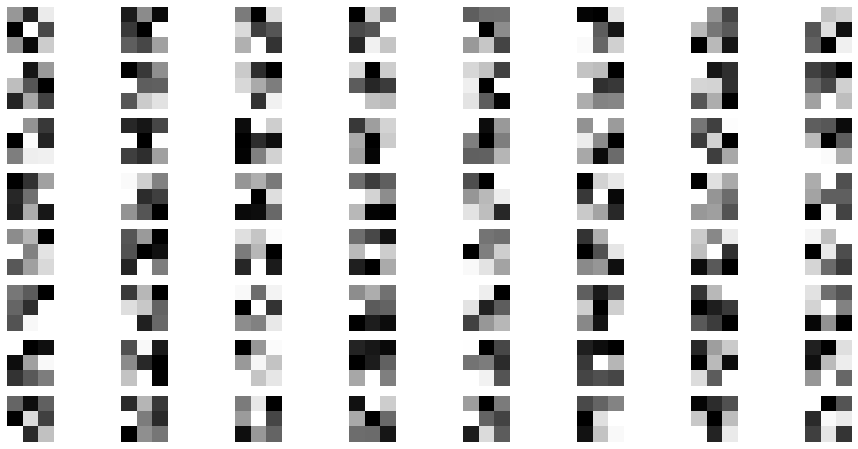

In [23]:
w, b = VGG.layers[2].get_weights()
plt.figure(figsize=(16,8))
for i in range(64):
  plt.subplot(8,8,i+1)
  imagen = w[:,:,0,i]
  plt.imshow(imagen,cmap="gray")
  plt.axis("off")
plt.show()

In [24]:
!wget ivc0023.ivitco.com/mascotas.zip

--2021-09-16 01:49:52--  http://ivc0023.ivitco.com/mascotas.zip
Resolving ivc0023.ivitco.com (ivc0023.ivitco.com)... 192.99.8.125
Connecting to ivc0023.ivitco.com (ivc0023.ivitco.com)|192.99.8.125|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ivc0023.ivitco.com/mascotas.zip [following]
--2021-09-16 01:49:52--  https://ivc0023.ivitco.com/mascotas.zip
Connecting to ivc0023.ivitco.com (ivc0023.ivitco.com)|192.99.8.125|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 719677467 (686M) [application/zip]
Saving to: ‘mascotas.zip’

mascotas.zip        100%[===================>] 686.34M  9.34MB/s    in 1m 50s  

2021-09-16 01:51:43 (6.21 MB/s) - ‘mascotas.zip’ saved [719677467/719677467]



In [ ]:
!unzip mascotas.zip

In [28]:
img = ke.preprocessing.image.load_img("mascotas/gato/1000.jpg",
                                                    target_size=(224,224))

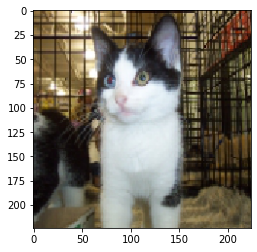

In [29]:
plt.imshow(img)

In [30]:
pred = vgg16.predict(ke.preprocessing.image.img_to_array(img)[None,...])

In [31]:
ke.applications.vgg16.decode_predictions(pred)

49152/35363 [=========================================] - 0s 0us/step


[[('n02123597', 'Siamese_cat', 0.90833235),
  ('n04589890', 'window_screen', 0.07628887),
  ('n02124075', 'Egyptian_cat', 0.011841363),
  ('n02328150', 'Angora', 0.0018211207),
  ('n02123045', 'tabby', 0.0005435444)]]

In [32]:
img = ke.preprocessing.image.load_img("mascotas/perro/1000.jpg",
                                                    target_size=(224,224))

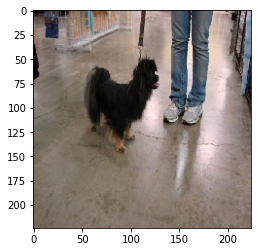

In [33]:
plt.imshow(img)


In [35]:
pred = vgg16.predict(ke.preprocessing.image.img_to_array(img)[None,...])
ke.applications.vgg16.decode_predictions(pred)

[[('n02098286', 'West_Highland_white_terrier', 0.4546869),
  ('n02111889', 'Samoyed', 0.2920728),
  ('n02105641', 'Old_English_sheepdog', 0.03432263),
  ('n02096177', 'cairn', 0.02854576),
  ('n02111500', 'Great_Pyrenees', 0.027994674)]]

In [36]:
data_train = ke.preprocessing.image_dataset_from_directory(
    "mascotas", batch_size=256, image_size=(150,150),
    validation_split=0.2, subset="training", seed=777
)

data_test = ke.preprocessing.image_dataset_from_directory(
    "mascotas", batch_size=256, image_size=(150,150),
    validation_split=0.2, subset="validation", seed=777
)

Found 23409 files belonging to 2 classes.
Using 18728 files for training.
Found 23409 files belonging to 2 classes.
Using 4681 files for validation.


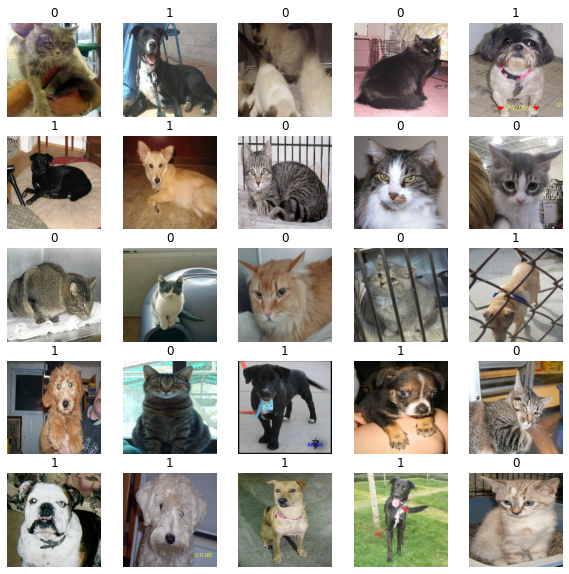

In [38]:
plt.figure(figsize=(10,10))

for imagen,label in data_train.take(1):
  for i in range(25):
    plt.subplot(5,5,1+i)
    plt.imshow(imagen[i].numpy().astype(np.uint8))
    plt.axis("off")
    plt.title(int(label[i]))